In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.join(os.getcwd(),"../Algorithm encapsulation"))
sys.path.append(os.path.join(os.getcwd(),".."))
print(sys.path)
from LMband import LMband
import pandas as pd
from ga_platoon import max_dt

['f:\\workspace\\jupyter\\论文\\graduation thesis\\Case Analysis', 'd:\\anaconda\\envs\\cplex\\python37.zip', 'd:\\anaconda\\envs\\cplex\\DLLs', 'd:\\anaconda\\envs\\cplex\\lib', 'd:\\anaconda\\envs\\cplex', '', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\chardet-3.0.4-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\docloud-1.0.375-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\urllib3-1.25.11-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\fonttools-4.36.0-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\cvxopt-1.3.0-py3.7-win-amd64.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\pytz-2022.2.1-py3.7.egg', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\win32\\lib', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\Pythonwin', 'd:\\anaconda\\envs\\cplex\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\0\\.ipython', 'f:\\wor

In [2]:
def get_rf(d,p):
    tmp=[]
    for i,a in enumerate(p):
        idx=np.where(a!=0)[0]
        a=a&0
        if len(idx)>0:
            a[:idx[0]]=1
        tmp.append((d[i]*a).sum())
    return tmp

In [3]:
phase = np.loadtxt("./data/phase")
cir=phase[0].sum()
phase=phase/cir
vol = np.loadtxt("./data/volume")
qv = np.loadtxt("./data/path_vol")
phase_get = np.load("./data/phase_get.npy")
d = np.loadtxt("./data/distance")
straight_get = np.load("./data/straight_get.npy")
ison = np.array([0, 0, 0, 1, 1, 1])
px = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
pxb = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
qb=[120,120]
lower, upper = 8, 14
linspace = np.arange(lower, upper, 1)
lin_num = len(linspace)

# 南北直行方向绿灯时间
sg=np.array([(straight_get[i]*phase).sum(axis=1) for i in range(len(straight_get))])
rho = vol[0] / vol[1]
num = len(vol[0])
numr = len(qv)
nump = len(phase_get)
M = 1e6
nx = 0.00000001
be = 8
speedScope = np.array([lower, upper])
speedVar = np.array([-2, 2])

g=np.array([(phase_get[i]*phase).sum(axis=1) for i in range(numr) ])
r=1-g
rf=np.array([get_rf(phase,phase_get[i]) for i in range(numr)])

ex=[1,0,1,0,1,0,1,1,1,1,1,0]
dwt=15
qb_x=np.ones_like(sg)*20
cap=np.ones_like(sg,dtype=int)*3

spd_on=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","上行速度数据.csv"),index_col=0)
spd_in=pd.read_csv(os.path.join(os.getcwd(),"..","speed analysis","下行速度数据.csv"),index_col=0)

In [4]:
lmb=LMband(phase, [80,180], vol, qv, phase_get, d, straight_get, ison, px, pxb, qb,qb_x,cap, lower, upper, 
           linspace, be, speedVar[0], speedVar[1],ex, dwt,lower,upper,speedVar[0], speedVar[1],spd_on,spd_in)
lmb._M1_solve()

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Tried aggregator 2 times.
MIP Presolve eliminated 335 rows and 104 columns.
MIP Presolve modified 996 coefficients.
Aggregator did 52 substitutions.
Reduced MIP has 949 rows, 449 columns, and 3116 nonzeros.
Reduced MIP has 68 binaries, 76 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (3.24 ticks)
Probing fixed 0 vars, tightened 51 bounds.
Probing time = 0.00 sec. (0.32 ticks)
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve modified 244 coefficients.
Reduced MIP has 949 rows, 449 columns, and 3116 nonzeros.
Reduced MIP has 68 binaries, 76 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.69 ticks)
Probing time = 0.00 sec. (0.30 ticks)
Clique table members: 29.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using 

In [5]:
lmb._M2_solve()

M1 2979.8435452400954 963.96
M1 2979.8435452400954 963.96
M1 2979.8435452400954 963.96
M1 2979.8435452400954 963.96
M1 2979.8435452400954 963.96
M1 2979.8435452400954 963.96
M1 2979.8435452400954 963.96
M1 2979.8435452400954 963.96
M1 2979.8435452400954 963.96
[[array([0.0199, 0.0795, 0.1561, 0.151 , 0.072 , 0.0169]), array([0.0003, 0.0051, 0.0384, 0.1265, 0.1814, 0.1134]), array([0.0102, 0.0288, 0.0603, 0.0939, 0.1086, 0.0934]), array([0.000e+00, 1.000e-04, 1.800e-03, 1.870e-02, 8.640e-02, 1.736e-01])], [array([0.0107, 0.0586, 0.1469, 0.1691, 0.0894, 0.0217]), array([0.0031, 0.0381, 0.153 , 0.203 , 0.089 , 0.0129]), array([0.    , 0.0004, 0.0119, 0.0952, 0.2188, 0.1447]), array([0.0004, 0.0077, 0.0577, 0.1654, 0.1808, 0.0754])]]
M1 2979.8435452400954 963.96
conflict(s): 0
Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125

Multi-objective solve log . . .

Index  Priority 

In [6]:
a=lmb.get_dataframe()
a

M2 0 929.0400401936522
M1 2979.8435452400954 963.96


,cross_number,distance,b1,b2,b3,b4,b5,b6,offset,p,...,u3,u4,u5,u6,bb1,bb2,dw1,dw2,tb1,tb2
0,1.0,800.0,22.818394,22.818394,0.000000,22.360616,0.000000,30.748191,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,22.818394,30.748191,37.600831,15.000000,137.600831,100.000000
1,2.0,520.0,21.038236,21.038236,0.000000,29.777195,0.000000,29.777195,50.666135,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21.038236,29.777195,15.000000,15.000000,54.919256,38.103881
2,3.0,500.0,21.038236,21.038236,0.000000,18.610747,0.000000,18.610747,31.577583,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21.038236,18.610747,15.000000,15.000000,50.714286,50.714286
3,4.0,490.0,20.633654,20.633658,0.000000,18.610747,0.000000,18.610747,80.916292,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.633654,18.610747,15.000000,15.000000,44.338424,35.890079
4,5.0,370.0,20.633654,20.633651,0.000000,20.633654,0.000000,20.633654,45.916292,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.633654,20.633654,40.008469,48.150000,86.258469,94.400000
5,6.0,254.0,43.328815,38.336258,43.328959,115.900358,0.000000,115.900316,7.727502,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,43.328887,115.900275,15.000000,15.000000,18.142857,18.142857
6,7.0,585.0,43.328959,38.336258,43.328815,43.328887,0.000000,43.328846,25.870380,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,43.328887,43.328887,15.000000,32.058178,73.125000,105.183178
7,8.0,1020.0,13.849393,0.000000,13.849393,0.000000,20.983966,0.000000,49.873998,1.0,...,1.000000e-08,1.000000e-08,1.000000e-08,1.000000e-08,13.849467,13.849393,36.450000,15.000000,163.950000,87.857143
8,9.0,409.0,9.627232,0.000000,25.012843,0.000000,20.983891,0.000000,40.370807,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,25.012843,13.849366,15.000000,15.000000,46.964284,44.214286
9,10.0,547.0,47.821679,0.000000,47.821679,47.821679,47.821701,0.000000,126.178495,1.0,...,1.000000e-08,1.000000e-08,-1.533351e-07,1.000000e-08,47.821679,47.821679,15.000000,15.000000,57.803571,75.377911


In [7]:
a.b1.mean(),a.b2[:8].mean(),a.b3[4:].mean(),a.b4.mean(),a.b5[7:].mean(),a.b6[:8].mean(),a.bb1.mean(),a.bb2.mean()

(29.81900567258896,
 22.854336394424145,
 32.98561226356227,
 34.65698548290603,
 37.21441808224615,
 34.70121205574126,
 31.00251994707269,
 37.43285095348445)

M2 0 929.0400401936522
M1 2979.8435452400954 963.96
M2 0 929.0400401936522


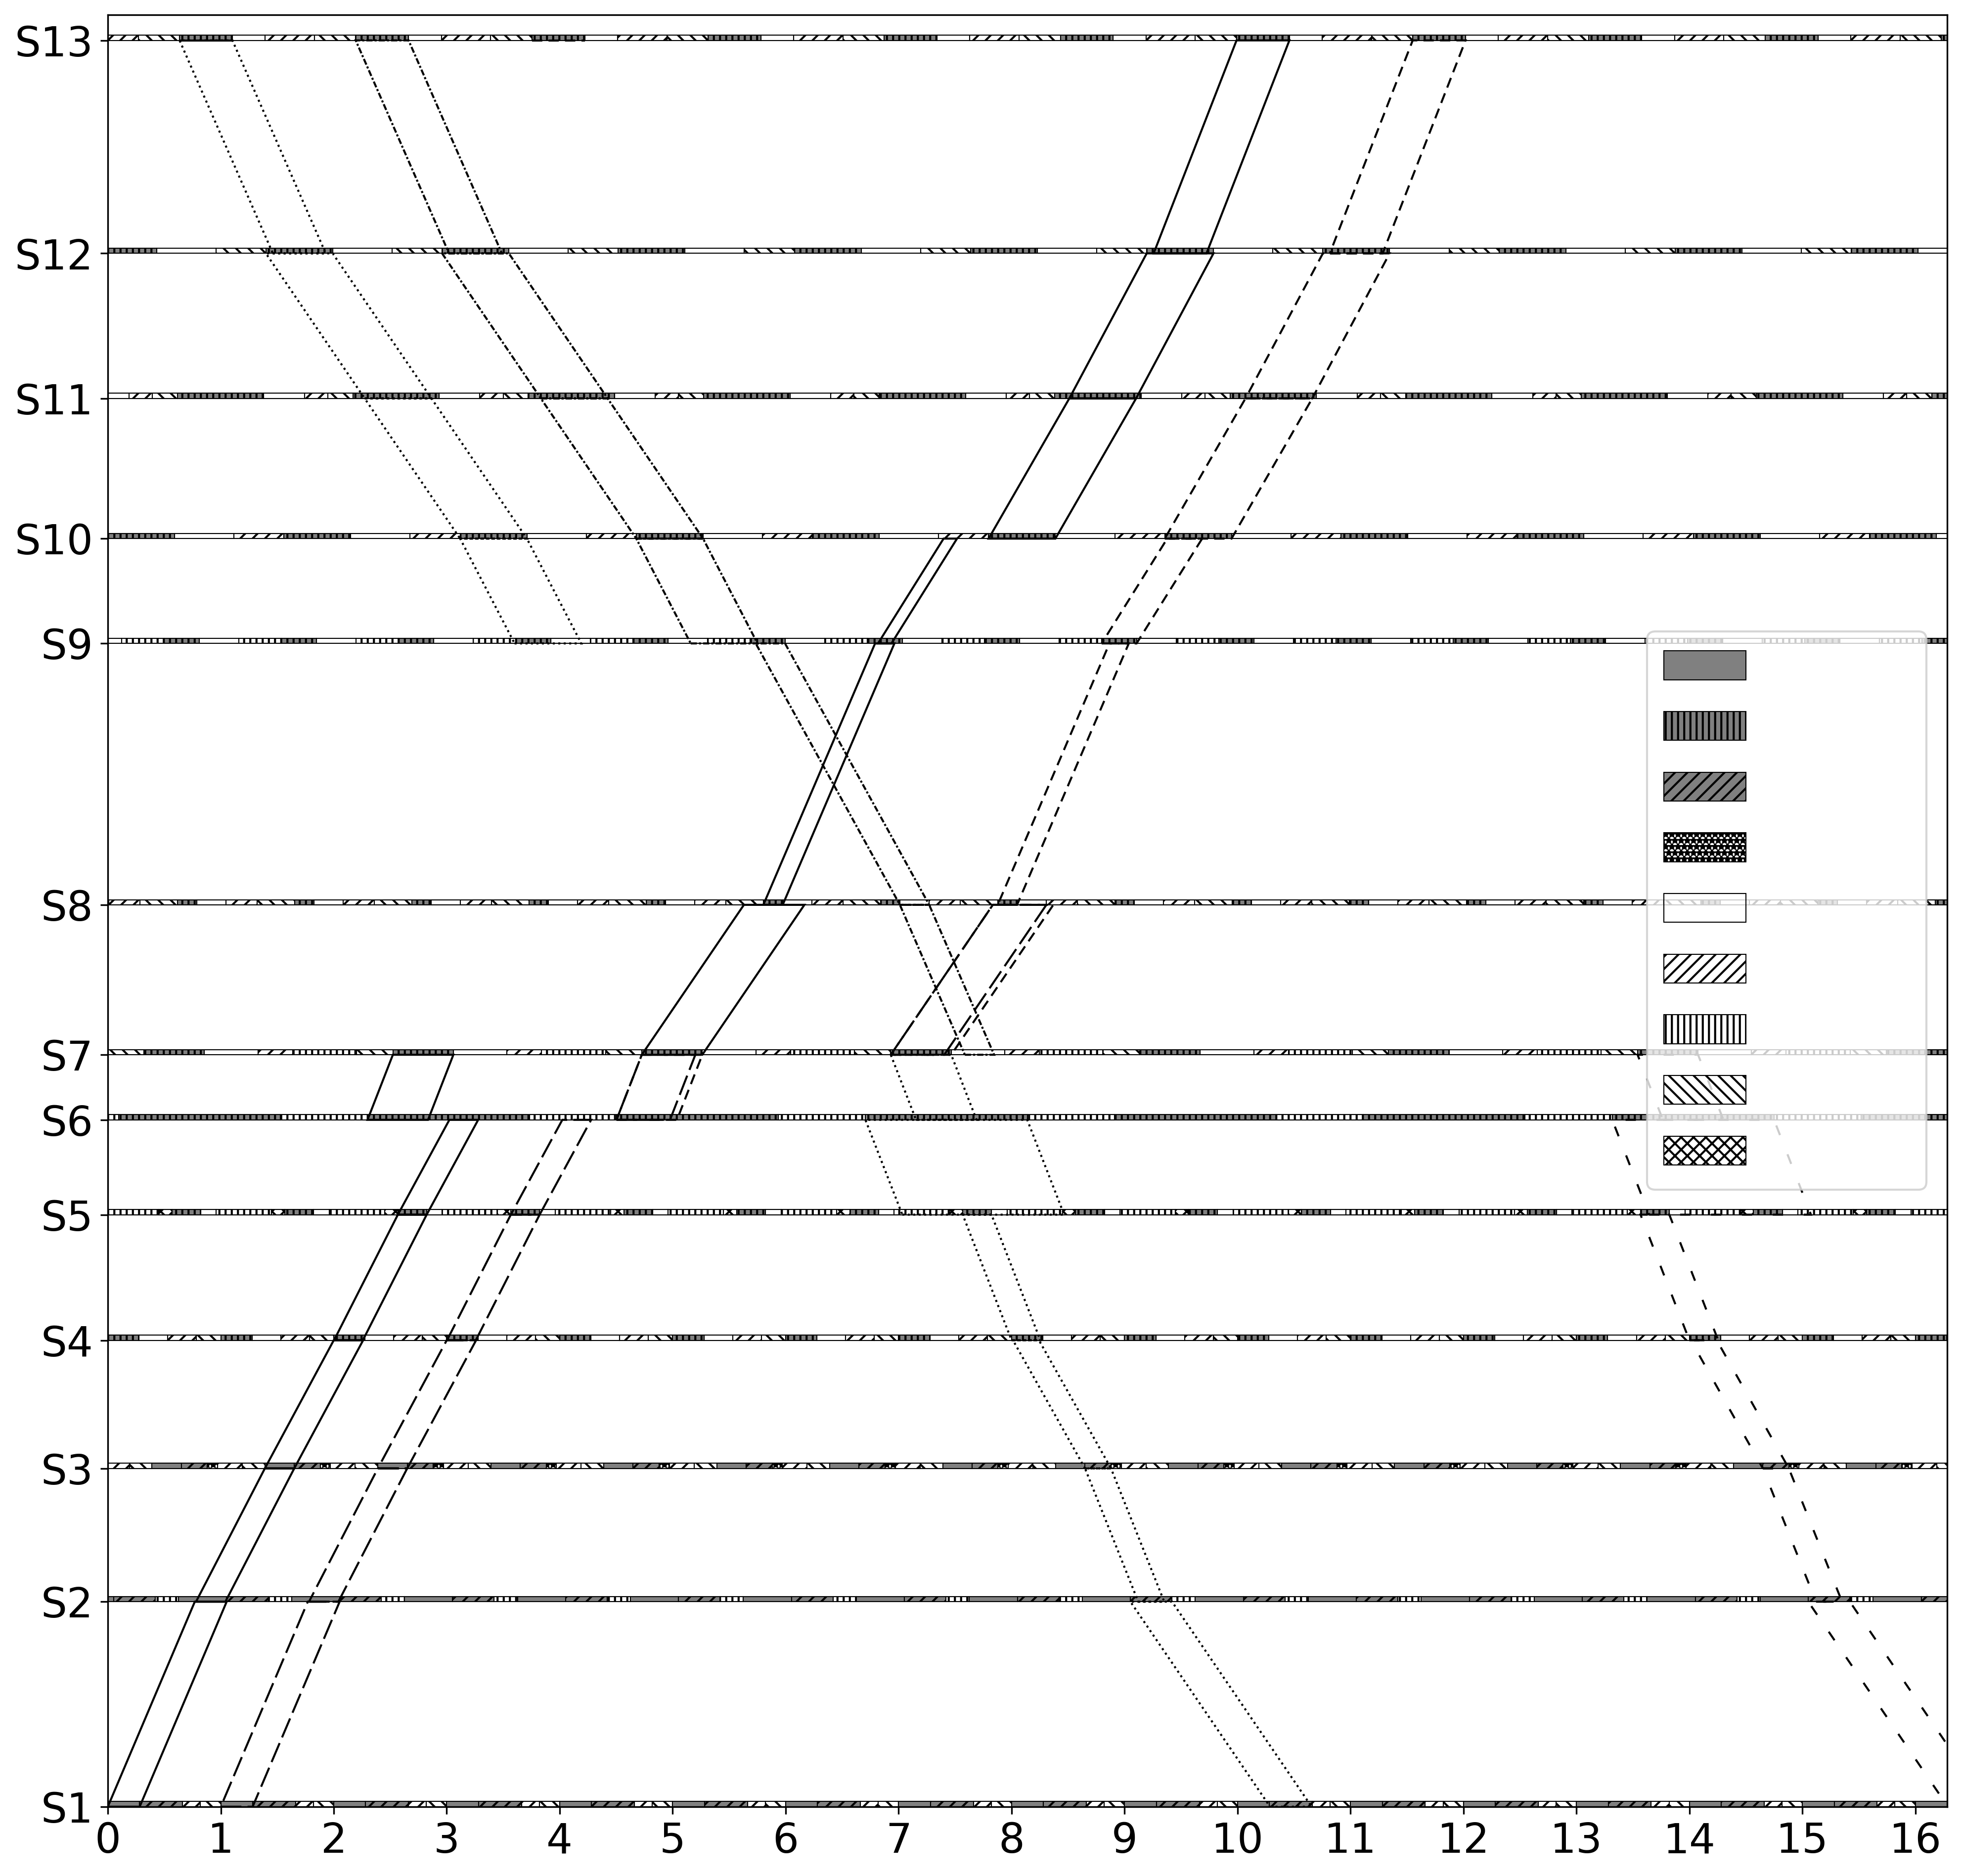

In [8]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
linestyles=[
    {"linestyle":"-" },
    {"linestyle":(5,(10,3))},
    {"linestyle":(0, (5, 3)) },
    {"linestyle":":" },
    {"linestyle":(0, (3, 1, 1, 1))  },
    {"linestyle": (0, (5, 10)) },
]
legends=["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
lmb.draw_car_bound("./时距图",colors,legends,2,linestyles)

M2 0 929.0400401936522
M1 2979.8435452400954 963.96
M2 0 929.0400401936522
1179.774298418977 14.580182509122979


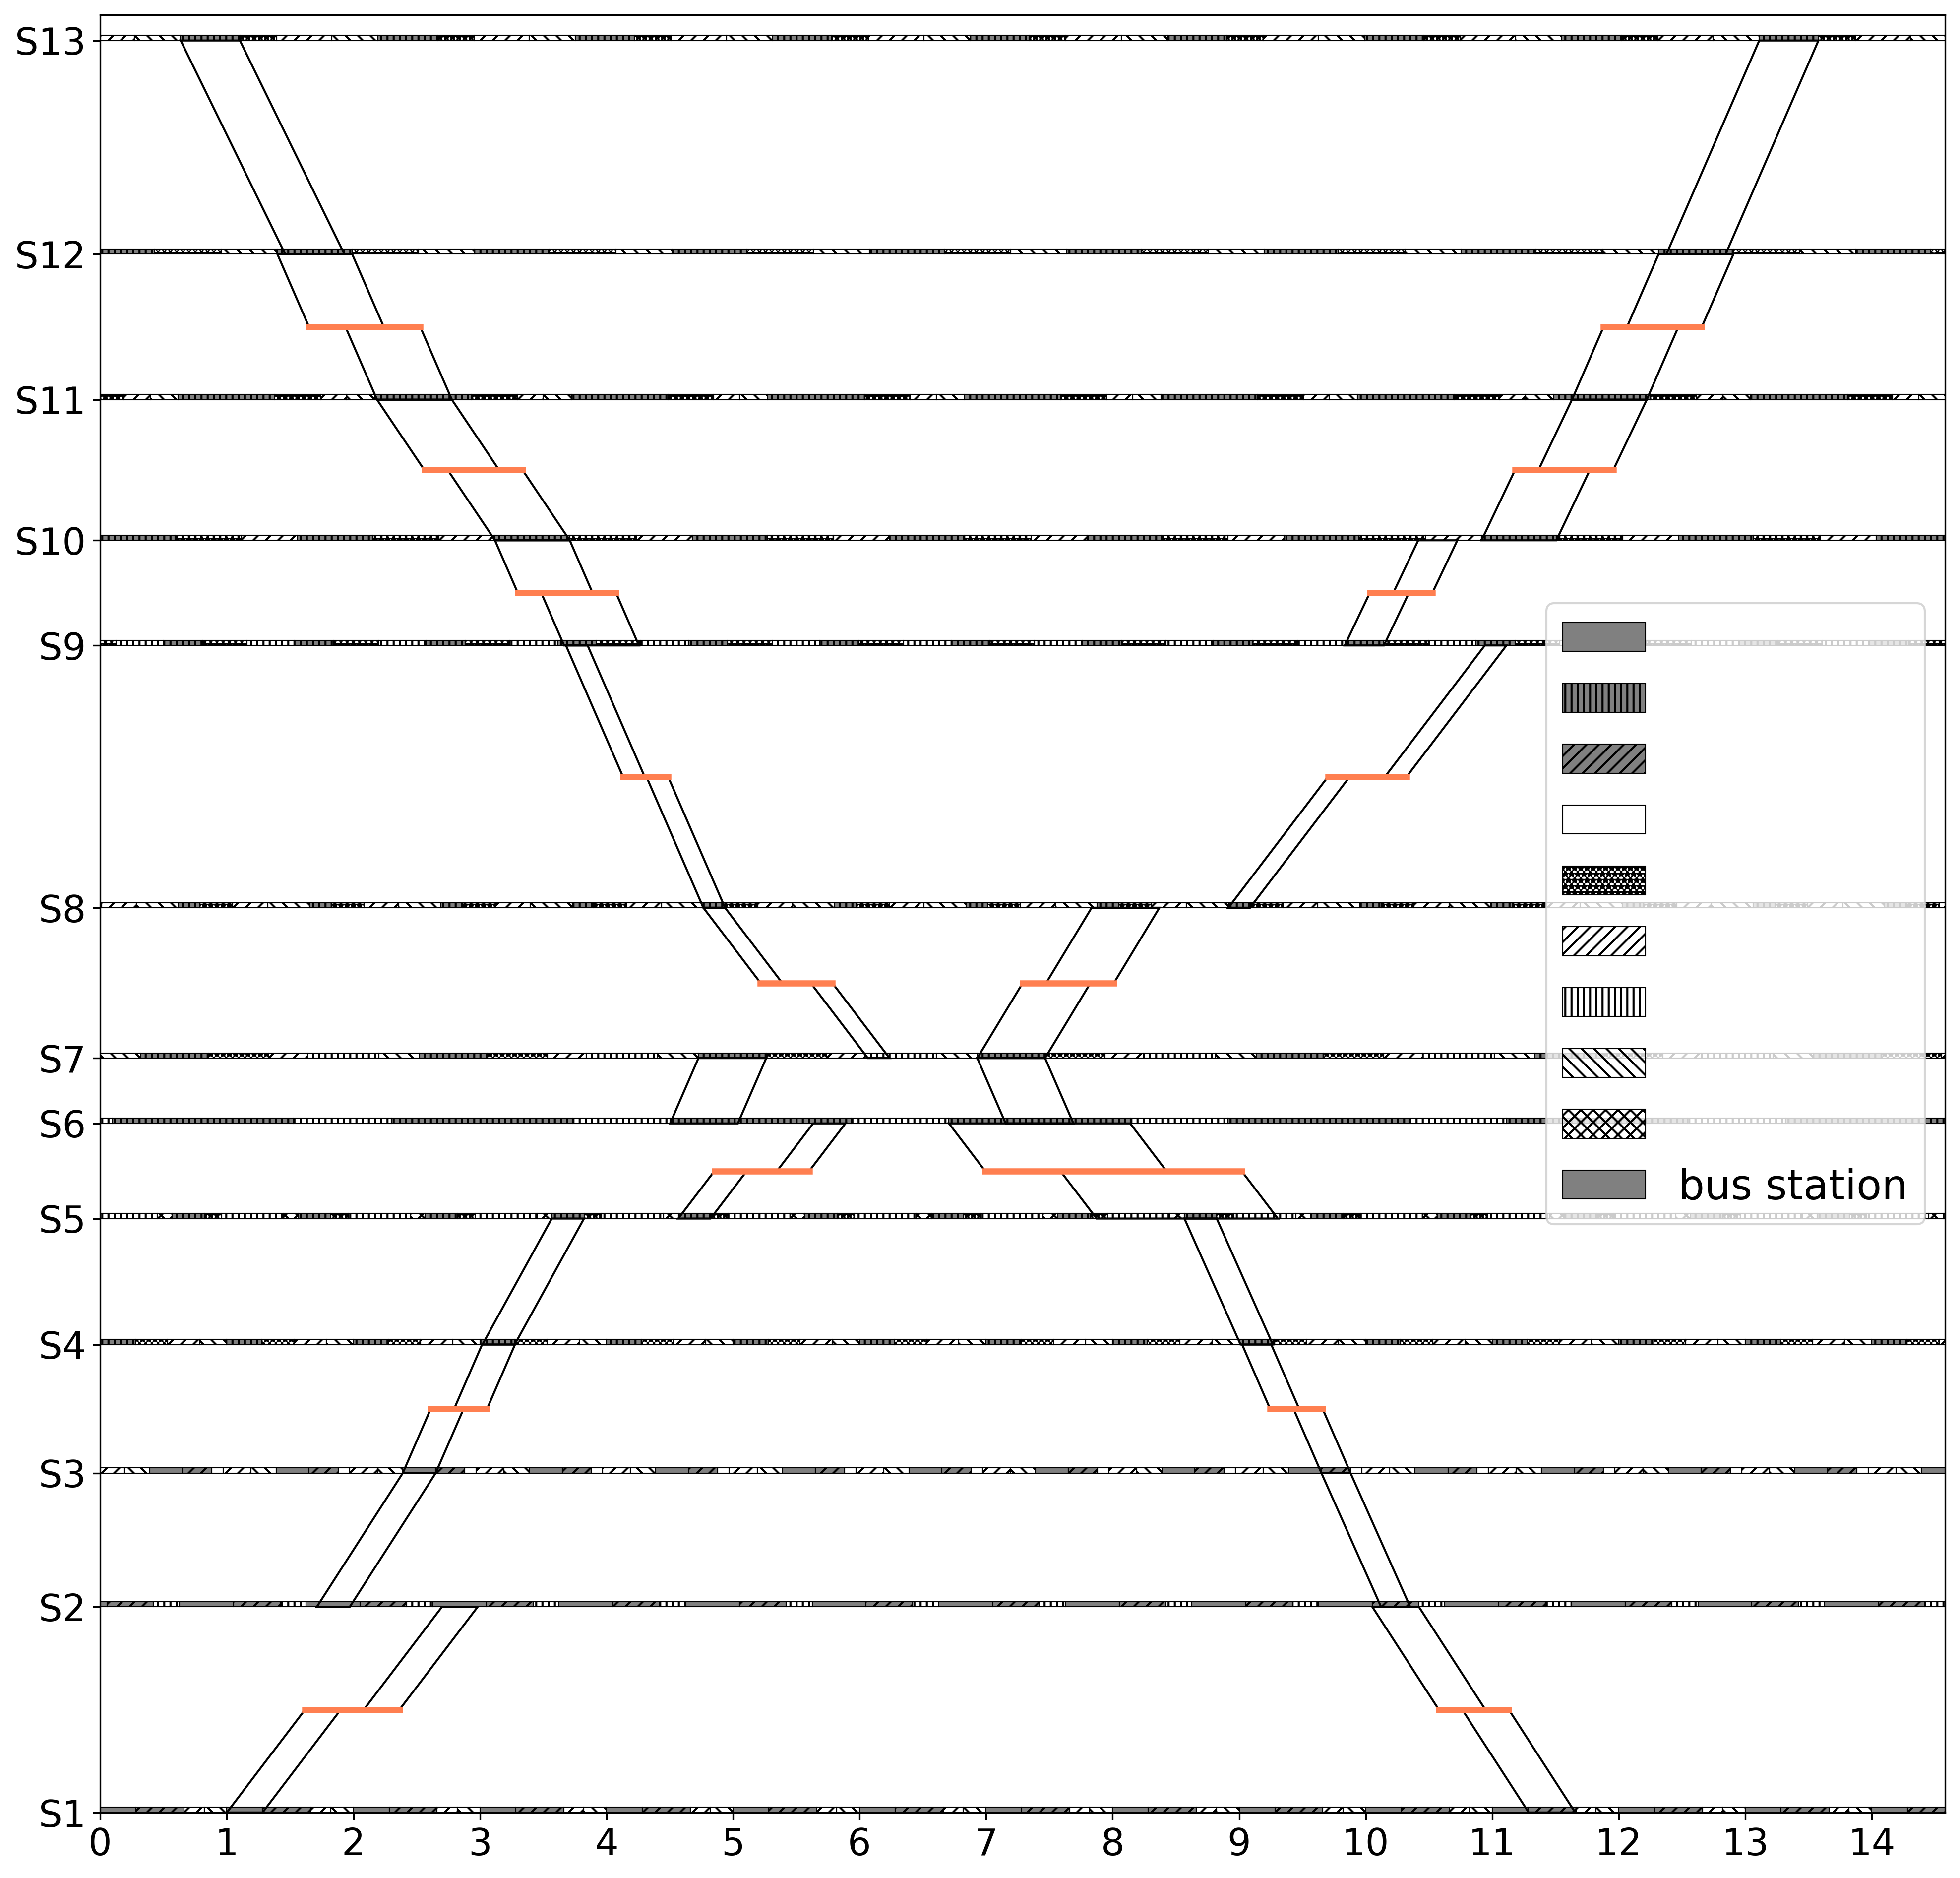

In [9]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
lmb.draw_bus_bound("./公交时距图",colors)

In [10]:
a.to_csv("./a.csv")

In [11]:
from  SimAnalysis import SimAnalysis
df=lmb.get_dataframe()
sim=SimAnalysis(df,phase,ex,os.path.join(os.getcwd(),"..","vissim","aa","zhongsan.inp"),
               os.path.join(os.getcwd(),"..","vissim","aa","vissim.ini"),
               os.path.join(os.getcwd(),"..","vissim","aa","zhongsan - 副本.inp"))
sim.start()
spdx=sim.analysis_speed(os.path.join(os.getcwd(),"..","vissim","aa","zhongsan - 副本.fzp"))
delayx=sim.analysis_delay(os.path.join(os.getcwd(),"..","vissim","aa",'zhongsan - 副本.vlz'))
tvltx=sim.analysis_traveltime(os.path.join(os.getcwd(),"..","vissim","aa",'zhongsan - 副本.rsz'))

M2 0 929.0400401936522
M1 2979.8435452400954 963.96


In [12]:
spdx.to_csv("./sensitivity/spdx/LMband.csv",encoding="utf-8-sig")

In [16]:
i=1
delayx[["delay"+str(i),"stoped"+str(i),"stops"+str(i),"vehicle"+str(i)]]

,delay1,stoped1,stops1,vehicle1
0,0.0,0.0,0.00,0
1,338.1,267.8,9.00,1
2,408.8,309.9,11.00,26
3,444.0,342.0,12.12,17
4,472.1,356.2,11.67,15
5,552.7,420.6,21.25,32
6,475.6,362.0,14.90,91


In [14]:
a=tvltx["traveltime"+str(i)].astype(float)
a[a!=0].mean()

1135.9125000000001

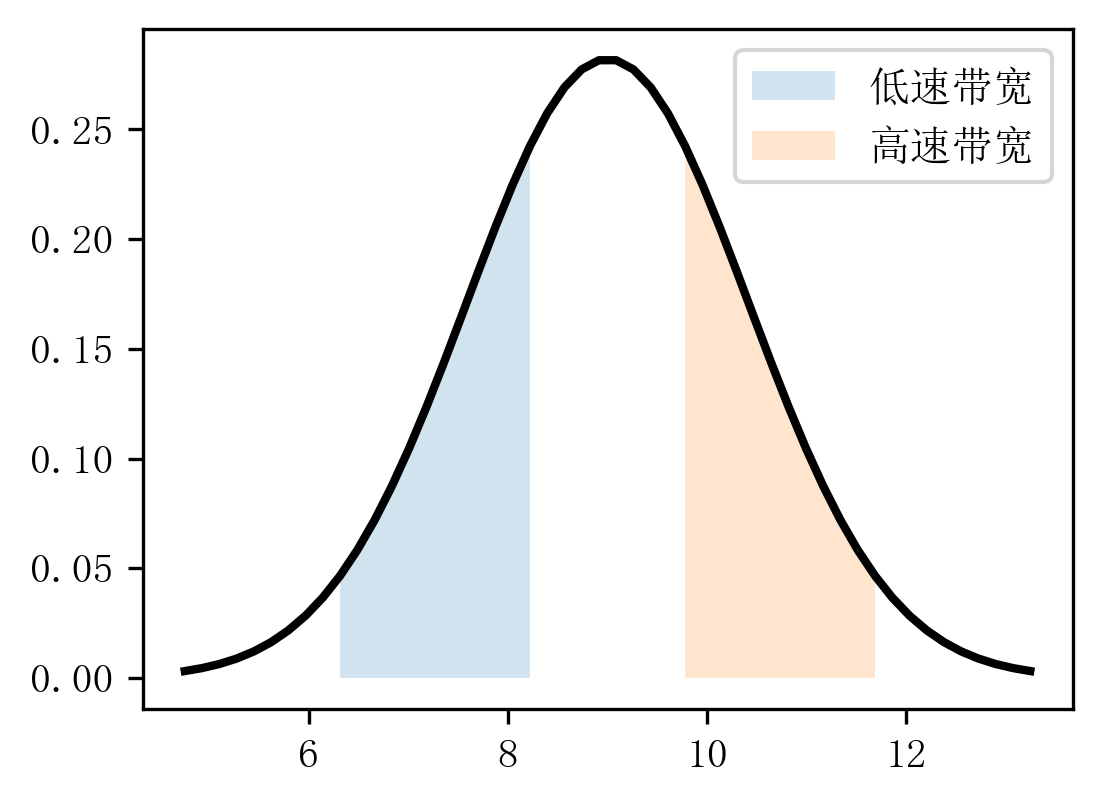

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']="SimSun"
fig = plt.figure(figsize=(4,3), dpi=300)
u = 9   # 均值μ
sig = math.sqrt(2)  # 标准差δ
x = np.linspace(u - 3*sig, u + 3*sig, 50)   # 定义域
y = np.exp(-(x - u) ** 2 / (2 * sig ** 2)) / (math.sqrt(2*math.pi)*sig) # 定义曲线函数
plt.plot(x, y, "black", linewidth=2)    # 加载曲线
l1=plt.fill_between(x, y, 0,where=((x>=u-2*sig)&(x<=u-sig/2)), alpha=0.2)
l2=plt.fill_between(x, y, 0,where=((x<=u+2*sig)&(x>=u+sig/2)), alpha=0.2)
# plt.grid(True)  # 网格线
plt.legend([l1,l2],["低速带宽","高速带宽"])
plt.show()  # 显示
fig.savefig("./正态分布")